In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
# Url plus your API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e65cf662f02f0b5b554ea5aaabadca98


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | epe
Processing Record 2 of Set 1 | tuatapere
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | varhaug
Processing Record 9 of Set 1 | omsukchan
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | dingle
Processing Record 21 of 

Processing Record 35 of Set 4 | troitsk
Processing Record 36 of Set 4 | nemuro
Processing Record 37 of Set 4 | colesberg
Processing Record 38 of Set 4 | ribeira brava
Processing Record 39 of Set 4 | yarkovo
Processing Record 40 of Set 4 | watertown
Processing Record 41 of Set 4 | marcona
City not found. Skipping...
Processing Record 42 of Set 4 | nador
Processing Record 43 of Set 4 | otacilio costa
Processing Record 44 of Set 4 | moroto
Processing Record 45 of Set 4 | port blair
Processing Record 46 of Set 4 | kangar
Processing Record 47 of Set 4 | camacha
Processing Record 48 of Set 4 | cherskiy
Processing Record 49 of Set 4 | port elizabeth
Processing Record 50 of Set 4 | vardo
Processing Record 1 of Set 5 | macheng
Processing Record 2 of Set 5 | san patricio
Processing Record 3 of Set 5 | maumere
Processing Record 4 of Set 5 | tonj
Processing Record 5 of Set 5 | skibbereen
Processing Record 6 of Set 5 | mahibadhoo
Processing Record 7 of Set 5 | satitoa
City not found. Skipping...
Pr

Processing Record 24 of Set 8 | taoudenni
Processing Record 25 of Set 8 | sandpoint
Processing Record 26 of Set 8 | hamilton
Processing Record 27 of Set 8 | tilichiki
Processing Record 28 of Set 8 | mount isa
Processing Record 29 of Set 8 | seoul
Processing Record 30 of Set 8 | bud
Processing Record 31 of Set 8 | burnie
Processing Record 32 of Set 8 | gat
Processing Record 33 of Set 8 | jiangyou
Processing Record 34 of Set 8 | buchanan
Processing Record 35 of Set 8 | pangkalanbuun
Processing Record 36 of Set 8 | along
Processing Record 37 of Set 8 | marsh harbour
Processing Record 38 of Set 8 | bad sankt leonhard
City not found. Skipping...
Processing Record 39 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 40 of Set 8 | sao jose da coroa grande
Processing Record 41 of Set 8 | moron
Processing Record 42 of Set 8 | atocha
Processing Record 43 of Set 8 | narsaq
Processing Record 44 of Set 8 | charters towers
Processing Record 45 of Set 8 | bhadasar
Processing Record 46 

Processing Record 14 of Set 12 | jitra
Processing Record 15 of Set 12 | maine-soroa
Processing Record 16 of Set 12 | kiama
Processing Record 17 of Set 12 | maksi
Processing Record 18 of Set 12 | lakatoro
Processing Record 19 of Set 12 | joura
Processing Record 20 of Set 12 | qaqortoq
Processing Record 21 of Set 12 | yambio
Processing Record 22 of Set 12 | gornyy
Processing Record 23 of Set 12 | san vicente
Processing Record 24 of Set 12 | itoman
Processing Record 25 of Set 12 | tokur
Processing Record 26 of Set 12 | kalispell
Processing Record 27 of Set 12 | bad sooden-allendorf
Processing Record 28 of Set 12 | bako
Processing Record 29 of Set 12 | takoradi
Processing Record 30 of Set 12 | urengoy
Processing Record 31 of Set 12 | beloha
Processing Record 32 of Set 12 | uryupinsk
Processing Record 33 of Set 12 | amahai
Processing Record 34 of Set 12 | yarmouth
Processing Record 35 of Set 12 | daru
Processing Record 36 of Set 12 | kallithea
-----------------------------
Data Retrieval Co

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Epe,6.5841,3.9834,74.17,94,100,4.45,NG,2022-07-25 06:47:19
1,Tuatapere,-46.1333,167.6833,43.56,88,100,2.10,NZ,2022-07-25 06:47:19
2,Hermanus,-34.4187,19.2345,52.81,70,0,11.27,ZA,2022-07-25 06:47:20
3,Puerto Ayora,-0.7393,-90.3518,69.55,92,92,5.01,EC,2022-07-25 06:44:48
4,Ilulissat,69.2167,-51.1000,36.45,98,100,1.66,GL,2022-07-25 06:47:20
5,Punta Arenas,-53.1500,-70.9167,35.71,69,0,11.50,CL,2022-07-25 06:42:23
6,Varhaug,58.6147,5.6457,62.85,97,100,15.26,NO,2022-07-25 06:47:21
7,Omsukchan,62.5333,155.8000,67.96,30,14,3.89,RU,2022-07-25 06:47:21
8,Hithadhoo,-0.6000,73.0833,82.31,72,14,9.35,MV,2022-07-25 06:47:22
9,Busselton,-33.6500,115.3333,62.76,64,7,20.38,AU,2022-07-25 06:47:22


In [11]:
city_data_df = city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Epe,NG,2022-07-25 06:47:19,6.5841,3.9834,74.17,94,100,4.45
1,Tuatapere,NZ,2022-07-25 06:47:19,-46.1333,167.6833,43.56,88,100,2.10
2,Hermanus,ZA,2022-07-25 06:47:20,-34.4187,19.2345,52.81,70,0,11.27
3,Puerto Ayora,EC,2022-07-25 06:44:48,-0.7393,-90.3518,69.55,92,92,5.01
4,Ilulissat,GL,2022-07-25 06:47:20,69.2167,-51.1000,36.45,98,100,1.66
5,Punta Arenas,CL,2022-07-25 06:42:23,-53.1500,-70.9167,35.71,69,0,11.50
6,Varhaug,NO,2022-07-25 06:47:21,58.6147,5.6457,62.85,97,100,15.26
7,Omsukchan,RU,2022-07-25 06:47:21,62.5333,155.8000,67.96,30,14,3.89
8,Hithadhoo,MV,2022-07-25 06:47:22,-0.6000,73.0833,82.31,72,14,9.35
9,Busselton,AU,2022-07-25 06:47:22,-33.6500,115.3333,62.76,64,7,20.38


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Epe,NG,2022-07-25 06:47:19,6.5841,3.9834,74.17,94,100,4.45
1,Tuatapere,NZ,2022-07-25 06:47:19,-46.1333,167.6833,43.56,88,100,2.10
2,Hermanus,ZA,2022-07-25 06:47:20,-34.4187,19.2345,52.81,70,0,11.27
3,Puerto Ayora,EC,2022-07-25 06:44:48,-0.7393,-90.3518,69.55,92,92,5.01
4,Ilulissat,GL,2022-07-25 06:47:20,69.2167,-51.1000,36.45,98,100,1.66
...,...,...,...,...,...,...,...,...,...
532,Uryupinsk,RU,2022-07-25 07:02:51,50.8047,42.0138,75.61,53,90,6.44
533,Amahai,ID,2022-07-25 07:02:51,-3.3333,128.9167,79.72,83,91,6.06
534,Yarmouth,US,2022-07-25 07:02:52,41.7057,-70.2286,78.96,90,100,18.41
535,Daru,PG,2022-07-25 07:02:52,-9.0763,143.2092,77.54,88,64,16.62


In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

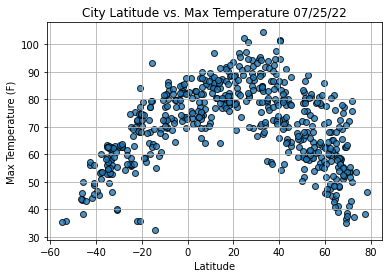

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

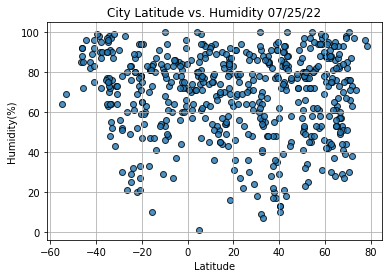

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

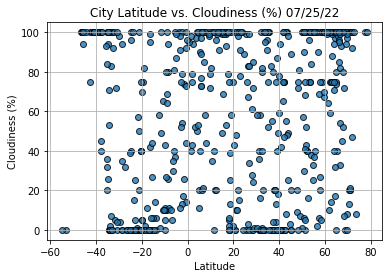

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

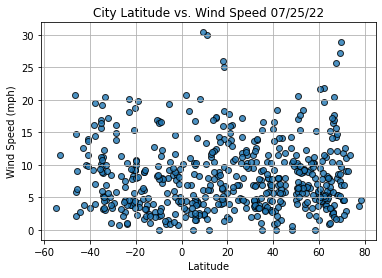

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [19]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [20]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(linregress(lats, temps))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
# A linear regression with a p-value > 0.05 is not statistically significant.

# A linear regression with a p-value < 0.05 is statistically significant.

LinregressResult(slope=-0.452929121241496, intercept=92.93922548147363, rvalue=-0.7590444753769936, pvalue=0.01089687086168761, stderr=0.13734880392044935, intercept_stderr=6.372784691788096)
y = -0.45x + 92.94
The p-value is: 0.011


In [21]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

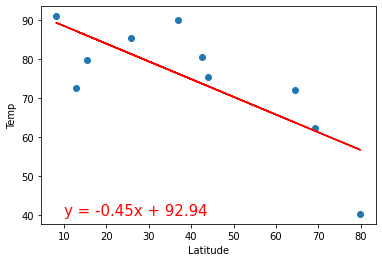

In [22]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                         Hilo
Country                        US
Date          2022-07-25 06:44:56
Lat                       19.7297
Lng                       -155.09
Max Temp                    78.28
Humidity                       83
Cloudiness                     75
Wind Speed                   5.75
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
532     True
533    False
534     True
535    False
536     True
Name: Lat, Length: 537, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Epe,NG,2022-07-25 06:47:19,6.5841,3.9834,74.17,94,100,4.45
4,Ilulissat,GL,2022-07-25 06:47:20,69.2167,-51.1000,36.45,98,100,1.66
6,Varhaug,NO,2022-07-25 06:47:21,58.6147,5.6457,62.85,97,100,15.26
7,Omsukchan,RU,2022-07-25 06:47:21,62.5333,155.8000,67.96,30,14,3.89
13,Hilo,US,2022-07-25 06:44:56,19.7297,-155.0900,78.28,83,75,5.75
...,...,...,...,...,...,...,...,...,...
529,Takoradi,GH,2022-07-25 07:00:17,4.8845,-1.7554,73.47,85,11,5.44
530,Urengoy,RU,2022-07-25 07:02:50,65.9667,78.3667,53.85,73,100,17.20
532,Uryupinsk,RU,2022-07-25 07:02:51,50.8047,42.0138,75.61,53,90,6.44
534,Yarmouth,US,2022-07-25 07:02:52,41.7057,-70.2286,78.96,90,100,18.41


In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Epe,NG,2022-07-25 06:47:19,6.5841,3.9834,74.17,94,100,4.45
4,Ilulissat,GL,2022-07-25 06:47:20,69.2167,-51.1000,36.45,98,100,1.66
6,Varhaug,NO,2022-07-25 06:47:21,58.6147,5.6457,62.85,97,100,15.26
7,Omsukchan,RU,2022-07-25 06:47:21,62.5333,155.8000,67.96,30,14,3.89
13,Hilo,US,2022-07-25 06:44:56,19.7297,-155.0900,78.28,83,75,5.75


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

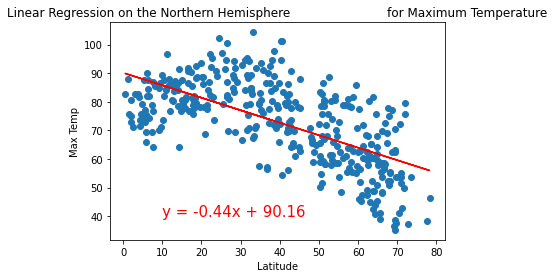

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

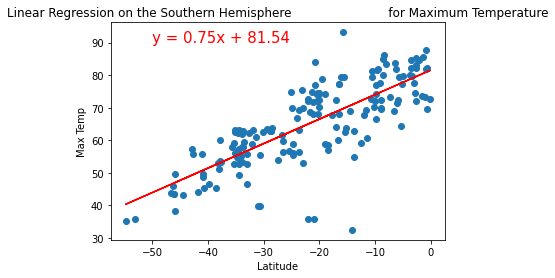

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

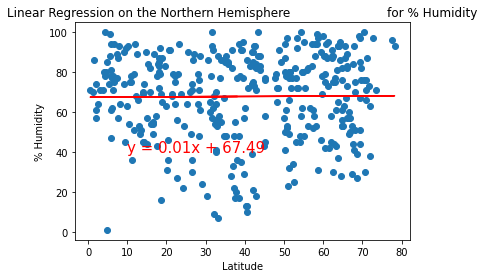

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(10,40))

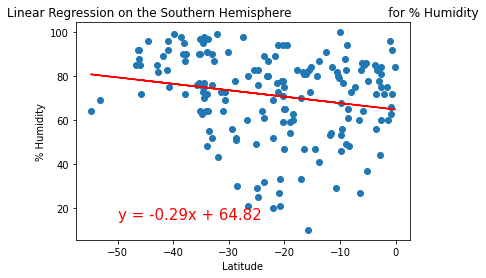

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

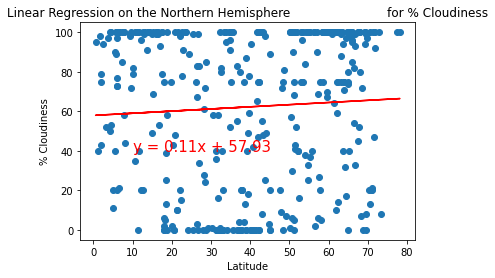

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

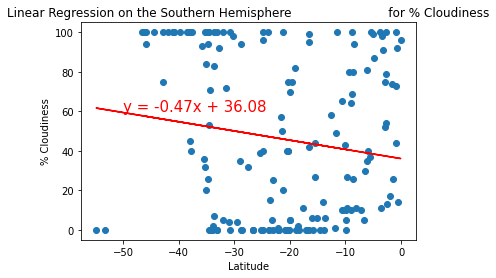

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

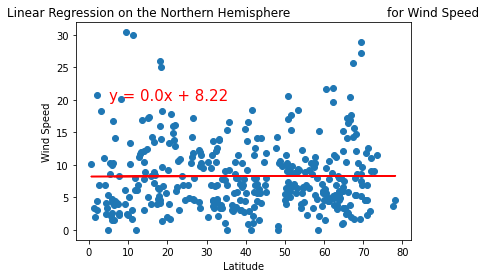

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,20))

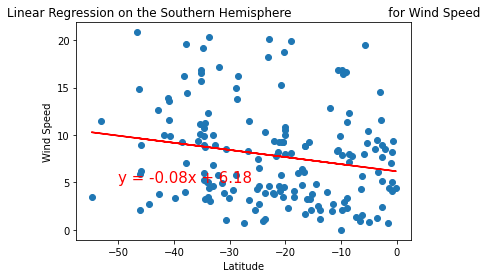

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,5))